# LIBRARIES

In [1]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import random
from random import choice
from collections import deque
import networkx as nx
import pandas as pd
import functions

### Working on wikigraph.csv

We imported the reduced csv file containing for each single edge in the graph the starting node (Named Source) and the final node (Named Target). To obtain a correct display we used a separator with respect to the tab and subsequently we renamed the two columns 0,1 as Source and Target.

In [2]:
graph = functions.read_graph_csv("wikigraph_reduced.csv")

In [3]:
graph

,Source,Target
0,95,1185516
1,108,1059989
2,108,1062426
3,108,1161925
4,134,541222
...,...,...
483089,1791481,1060990
483090,1791481,1061382
483091,1791481,1110380
483092,1791482,80740


### Working on page names

We have uploaded the Text file containing the names of each single page. Once loaded, to obtain a correct view, we wanted to split the single column containing both the name of the page and the node associated with the page into two separate columns.

In [4]:
functions.read_page_names("Names.txt")

,Pages
Node,
0,Chiasmal syndrome
1,Kleroterion
2,Pinakion
3,LyndonHochschildSerre spectral sequence
4,Zariski's main theorem
...,...
1791484,Noadiah Russell (Yale founder)
1791485,Cornus officinalis
1791486,Peter Grummitt


### Working on topcast categories

Finally, we uploaded the text file containing the list of pages associated with this category for each single category. Also in this case for a correct visualization we have carried out various operations. Once you have read the text file with separator and division into columns. We then worked on the two columns, on the Category column we deleted the initial part of the string for each row while for the PageList column we split the pages and created a list. We have also only considered categories with a number of articles between 5000 and 30000 as required by the Homework.

In [5]:
data_cat = functions.read_top_categories('Categories.txt')

In [6]:
data_cat

,Category,PageList
0,English_footballers,"[22860, 28411, 28961, 28979, 29264, 29573, 295..."
1,The_Football_League_players,"[14003, 23536, 27109, 27348, 27459, 27989, 280..."
2,Association_football_forwards,"[26876, 26877, 26879, 26887, 26892, 26904, 269..."
3,Association_football_midfielders,"[14003, 15291, 23536, 26880, 26882, 26885, 268..."
4,Association_football_defenders,"[15217, 22860, 26873, 26878, 26881, 26898, 269..."
5,Harvard_University_alumni,"[77, 1013, 1271, 1663, 1779, 1843, 2212, 3193,..."
6,Major_League_Baseball_pitchers,"[79, 24213, 33054, 37167, 53973, 63107, 69823,..."
7,Members_of_the_United_Kingdom_Parliament_for_E...,"[29098, 29493, 29585, 30255, 30389, 30505, 306..."
8,Indian_films,"[1308, 29286, 53565, 70274, 70275, 70797, 1233..."
9,Year_of_death_missing,"[98, 126, 227, 1823, 2170, 2223, 13215, 14003,..."


We have decided to create a new data frame containing the category of belonging for each article. Subsequently we created a dictionary containing the individual articles as keys and the categories of belonging as values for each key. We did it all because one article might belong to a single category or multiple ones. In the case of multiple appearance, we have to break the ties uniformly at random. We have in fact modified the dictionary created by randomly choosing the category it belongs to for each article. Subsequently we obtained the reverse dictionary by choosing the various categories as keys and the list of pages associated with them as values for each key and finally we obtained a new dataframe

In [7]:
df_article = pd.concat([pd.DataFrame(data = {'Articles': data_cat.loc[i].PageList, 
                                             'Category': data_cat.loc[i].Category}) for i in data_cat.index], 
                       ignore_index=True) #Create a new datagrame where for each article we report the specific category

In [8]:
df_article

,Articles,Category
0,22860,English_footballers
1,28411,English_footballers
2,28961,English_footballers
3,28979,English_footballers
4,29264,English_footballers
...,...,...
198953,1790533,Place_of_birth_missing_(living_people)
198954,1790602,Place_of_birth_missing_(living_people)
198955,1790605,Place_of_birth_missing_(living_people)
198956,1790616,Place_of_birth_missing_(living_people)


In [9]:
random_dict = functions.random_dictionary(df_article)

100%|██████████| 198958/198958 [00:08<00:00, 22339.51it/s]


In [10]:
random_dict

{'22860': 'English_footballers',
 '28411': 'Year_of_birth_missing',
 '28961': 'English_footballers',
 '28979': 'English_footballers',
 '29264': 'English_footballers',
 '29573': 'The_Football_League_players',
 '29582': 'The_Football_League_players',
 '30896': 'English_footballers',
 '30900': 'English_footballers',
 '31902': 'English_footballers',
 '33973': 'Association_football_forwards',
 '34042': 'English_footballers',
 '41141': 'English_footballers',
 '43573': 'The_Football_League_players',
 '48582': 'The_Football_League_players',
 '48583': 'English_footballers',
 '48714': 'Association_football_forwards',
 '48718': 'English_footballers',
 '48730': 'English_footballers',
 '48922': 'The_Football_League_players',
 '54184': 'The_Football_League_players',
 '72481': 'The_Football_League_players',
 '72482': 'English_footballers',
 '72483': 'English_footballers',
 '72488': 'Association_football_midfielders',
 '72493': 'English_footballers',
 '72496': 'English_footballers',
 '72518': 'English

In [11]:
new_data = functions.reversed_dictionary(random_dict)

In [12]:
new_data

,Category,PageList
0,English_footballers,"[22860, 28961, 28979, 29264, 30896, 30900, 319..."
1,Year_of_birth_missing,"[28411, 73047, 75306, 76428, 93702, 94137, 107..."
2,The_Football_League_players,"[29573, 29582, 43573, 48582, 48922, 54184, 724..."
3,Association_football_forwards,"[33973, 48714, 72522, 72535, 72536, 72622, 726..."
4,Association_football_midfielders,"[72488, 72567, 72580, 73107, 73132, 73145, 731..."
5,Association_football_defenders,"[72549, 72616, 72797, 72943, 73070, 73114, 731..."
6,Year_of_death_missing,"[72583, 72587, 72605, 72620, 72769, 72826, 728..."
7,Place_of_birth_missing_(living_people),"[72914, 78524, 81209, 93493, 603936, 1640049, ..."
8,Members_of_the_United_Kingdom_Parliament_for_E...,"[536702, 543951, 670907, 536438, 538800, 53913..."
9,Harvard_University_alumni,"[77, 1013, 1271, 1663, 1779, 1843, 2212, 3193,..."


# [RQ1]

## Creating the Graph
As a first step we can check if the graph is directed or not.
### Is the graph directed?

 We create a new dataframe where the columns of 'graph' are inverted in order to create the list of edge for both of the dataframe and check in they are equal. In case of a positive answer we can say that the graph is not directed because for each edge from node _a_ to node _b_ there is an edge from node _b_ to node _a_. 

In [14]:
functions.is_directed(graph)

KeyboardInterrupt: 

The graph is directed since there exists an edge from a certain node _a_ to a node _b_ but not from _b_ to _a_.

After figuring out if the graph was direct or not, we have created an empty Direct graph through the networkx package using as nodes all the elements belonging to the Source and Target columns in the reduced downloaded dataframe. We then created arcs from the ith node of the Source column to the ith node of the Target column, all weighted with a value equal to 1.

In [13]:
G = functions.create_graph(graph)

In [14]:
G

### How many articles are we considering?

We obtained the total number of nodes in the graph by reporting all the elements of the two columns in the downloaded dataset in the form of a set in order to eliminate any duplication. Once this was done we created a new set given by the union of the previous sets and we calculated its length

In [15]:
nodes = functions.number_articles(graph)

In [16]:
nodes

98343

### How many hyperlinks between pages exist?

The total number of hyperlinks belonging to the graph is equal to the number of edges present. This value corresponds to the length of the reduced datasaet downloaded as we can consider it as the Edge List of the graph.

In [17]:
edges = functions.number_hyperlinks(graph)

In [18]:
edges

483094

### Compute the average number of links in an arbitrary page

We obtained the average of links for each node in the graph by calculating the overall sum of the degrees of each single node in the graph and dividing this sum by the number of nodes in the graph.

In [19]:
functions.average_links(G)

9.824674862471147

### Graph Density

Since the degree obtained is a direct degree then we can define its density given by the ratio between the number of arcs in the degree and the binomial coefficient of the number of nodes out of 2. The binomial coefficient is multiplied by two being a direct graph and consequently being fundamental the direction of the arch

${\displaystyle D={\frac {|E|}{2{\binom {|V|}{2}}}}={\frac {|E|}{|V|(|V|-1)}}}$

In [20]:
functions.graph_density(nodes,edges) 

4.9951571365597335e-05

Our graph is a sparse graph whose density D is in the lower range of the density's codomain, or $0 \leq D < \frac {1} {2}$. To confirm this we can compare the number of maximum arcs for the graph created with the previously calculated edges value.

In [21]:
functions.comparison_edges(nodes,edges)

The value of max edges is 9671247306 while the value of edges is equals 483094


## Plot Degree's nodes distribution

Finally, we reported through a plot nodes'degree distribution by defining its degree for each single node within the graph.

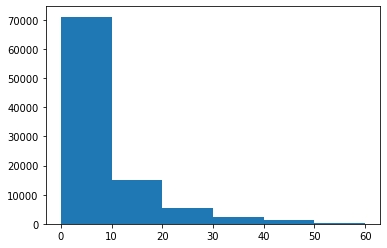

In [22]:
functions.plot_degree_dist(G)

# [RQ2]

We take in input the starting node and the number of clicks $d$, then starting from initial node we reach all the node at level $k$  with $k\leq d$ considering the starting node as level 0.

As an example we can compute all the pages reachable starting from node 95 with 3 clicks:

In [14]:
data_name.iloc[list(functions.clicks(G, 95, 3))].head()

,Pages
Node,
1595904,Reba McEntire
1182721,Ma (album)
1061891,Jodie Foster
1067523,Valentine (film)
1060361,Rose McGowan


# [RQ3]

We ask for a category as input, then we search for this category in the dataframe containing all the categories and if the category falls, we insert all the pages associated with that category in the set "nodes". Then we return either the set nodes or if the category is not present in the dataframe the string "No Category"

In [23]:
new_data

,Category,PageList
0,English_footballers,"[22860, 28961, 28979, 29573, 30896, 30900, 319..."
1,Association_football_defenders,"[28411, 34042, 48583, 72616, 72617, 72747, 729..."
2,The_Football_League_players,"[29264, 29582, 33973, 48582, 48714, 48922, 724..."
3,Association_football_forwards,"[72483, 72633, 72802, 72806, 72824, 72945, 731..."
4,Year_of_death_missing,"[72518, 72579, 72589, 72605, 72839, 72873, 729..."
5,Year_of_birth_missing,"[72664, 72829, 76045, 76100, 92857, 93457, 937..."
6,Association_football_midfielders,"[73054, 73145, 73309, 75212, 75277, 75279, 753..."
7,Place_of_birth_missing_(living_people),"[84217, 93466, 97775, 1640049, 1659538, 83446,..."
8,Members_of_the_United_Kingdom_Parliament_for_E...,"[536702, 536703, 538562, 539130, 539779, 54002..."
9,Harvard_University_alumni,"[77, 1013, 1271, 1663, 1779, 1843, 2212, 3193,..."


## What Category?

I ask to put in input a category to define the list of pages that we want to reach.

In [23]:
nodes = functions.category(new_data)

Enter your Category: Rivers_of_Romani


In [24]:
nodes

[72111,
 72112,
 72113,
 72114,
 72115,
 72116,
 72117,
 72118,
 72119,
 72120,
 72121,
 72122,
 72123,
 72124,
 72125,
 72126,
 72127,
 72128,
 72129,
 72130,
 72131,
 72132,
 72133,
 72134,
 72135,
 72136,
 72137,
 72138,
 72139,
 72140,
 72141,
 72142,
 72143,
 72144,
 72145,
 72146,
 72147,
 72148,
 72149,
 72150,
 72151,
 72152,
 72153,
 72154,
 104973,
 134749,
 159477,
 159478,
 177284,
 177285,
 210923,
 217465,
 217466,
 217467,
 217468,
 217469,
 217470,
 217471,
 217472,
 217473,
 217474,
 217475,
 217476,
 217477,
 217478,
 217479,
 217481,
 217482,
 217484,
 217485,
 217486,
 217487,
 217488,
 217489,
 217490,
 217491,
 217492,
 217493,
 217494,
 217495,
 217496,
 217497,
 217498,
 217499,
 217500,
 217501,
 217502,
 217503,
 217504,
 217505,
 217506,
 217507,
 217508,
 217509,
 217510,
 217511,
 217512,
 217513,
 217514,
 217515,
 217516,
 217517,
 217518,
 217519,
 217520,
 217521,
 217522,
 217523,
 217524,
 217525,
 217526,
 217527,
 217528,
 217529,
 217530,
 217531,


## Degree Centrality

For the list of nodes obtained for the specific category, let's search for the most central node. We use degree-centrality as a measure of centrality. We get the degree-centrality with respect to the entire graph and then we return a dictionary containing as keys the nodes of the specific category and for each node its own centrality, finally we get the dictionary key with the maximum value. The key obtained represents centrality

In [25]:
v = functions.degree_centrality(G,nodes)

In [26]:
v

786913

## Find Minimum Distance

To calculate the minimum distance necessary so that starting from the most central node we could reach all the pages of the specific Category, we tried to search for the ShortestPath following the BFS (Breadth-first-Search) algorithm. Starting from the initial (most central) node, we searched for all its neighbors we visited. Each visited node becomes the new node to visit so we increase the distance from the initial node by increasing the variable (start_distance +1). From the current node we search for new neighbors and we repeat the procedure until for the current node we are on there are no neighbors to that point we stop the search. We first check if the graph is connected. If this is not the case, we report the error otherwise we try to understand if all the nodes have been visited. If so we report the minimum distance otherwise we report the error.

In [27]:
 functions.minimum_distance(G,v,nodes)

Partial number Click obtained before the node on which one has arrived has no more neighbors is: 11
Not Possible because Graph is not Connected


# [RQ4]
### Step 1 : costructing the subgraph of C1 and C2
To answer question 4 first of all we need to build the subgraph induced by the categories selected, the new graph contains the node of C1 and C2 and all the edges among the nodes of these two categories

In [43]:
C1 = input("Enter the first Category: ")
C2 = input("Enter the second Category: ")

Enter the first Category: Association_football_forwards
Enter the second Category: Association_football_midfielders


In [44]:
G_sub = functions.sub_graph(G, C1,C2)

In [45]:
nx.info(G_sub)

'Name: \nType: DiGraph\nNumber of nodes: 5266\nNumber of edges: 7430\nAverage in degree:   1.4109\nAverage out degree:   1.4109'

### Let v and u two arbitrary pages in the subgraph. What is the minimum set of hyperlinks one can remove to disconnect u and v?
This is a <b> min cut </b> problem : we want to find the minimum number of edges to remove in order to disconect two given nodes in the graph. <br>
We can solve this problem using two main results:
- Max-flow min-cut theorem
- Ford_Fulkerson algorithm <br>
The theorem asserts that <i>the maximum amount of flow passing from the source to the sink is equal to the total weight of the edges in a minimum cut</i> and the algorithm can find the maximum flow so the minimum cut.

#### Ford_Fulkerson algorithm
This algorithm needs the support of a BFS algorithm that returns the path from the node u to node v, if it exists. The idea behind the algorithm is as follows: as long as there is a path from the source (start node) to the sink (end node), with available capacity on all edges in the path, we send flow along one of the paths. Then we find another path, and so on.

In order to give an efficient implementation of the algorithm we map the nodes of G_sub into [0,...,len(G_sub.nodes)] and then, we build the adjacency matrix associated at this graph. The function _nx.adjacency_matrix()_ provided by networkx library returns a sparse matrix that we can convert in a numpy matrix using _.toarray()_ .

In [47]:
#Mapping G_sub into [0,...,len(G_sub.nodes)]
mapping = {old_label:new_label for new_label, old_label in enumerate(G_sub.nodes())}
H_sub = nx.relabel_nodes(G_sub, mapping)

In [48]:
#Sparse adjacency matrix
Adj_Mat_sparse = nx.adjacency_matrix(H_sub)

In [49]:
#Numpy adjacency matrix
Adj_Mat = Adj_Mat_sparse.toarray()

In [71]:
#Nodes u and v of H_sub picked at random
u = choice(list(H_sub.nodes))
v = choice(list(H_sub.nodes))

In [35]:
min_cut = functions.ford_fulkerson(Adj_Mat, u, v)
min_cut

1

# RQ 5

In [91]:
with open('new_categories.txt',encoding='utf-8') as json_file:
    categories = json.load(json_file)

In [92]:
class Graph:
    def __init__(self):
        self.outgoing = defaultdict(list)
        self.incoming = defaultdict(list)
        self.edges = []
    def insert_edge(self, u, v):
        self.outgoing[u].append(v)
        self.incoming[v].append(u)
        self.edges.append((u,v))
    def vertices(self):
        return list(set(self.outgoing.keys()) | set(self.incoming.keys()))

In [93]:
path = 'wikigraph_reduced.csv'
dataset = pd.read_csv(path)
dataset = dataset.rename(columns={"Unnamed: 0": "Hyperlinks_Id", "0": "Source", "1": "Target"})
dataset.head()

,Hyperlinks_Id,Source,Target
0,796,95,1185516
1,909,108,1059989
2,910,108,1062426
3,911,108,1161925
4,1141,134,541222


In [94]:
g = Graph()
_ = dataset.apply(lambda row: g.insert_edge(row['Source'], row['Target']), axis = 1)

In [95]:
def shortpath(graph, source, articles):

    v = [source]
    lvl = [source]
    
    distances = dict.fromkeys(articles, -1)
    count = 1
    while True:
        new_lvl = []
        for article in lvl:
            for adj in graph.incident_edges(article):
                if adj not in v:
                    new_lvl.append(adj)
                    v.append(adj)
                    if adj in articles:
                        distances[adj] = count
        if len(new_lvl) == 0:
            break
        lvl = new_lvl
        count +=1
    
    if (np.array(list(distances.values())) == -1).all():
        return -1
    else:
        shortest_distance = min([distance for article, distance in distances.items() if distance != -1])
        
    return shortest_distance

In [97]:
def c_distance(graph, categories, input_category):

    cate_distances = {}
    
    for category, articles in categories.items():
        shortest_path = {}
        articles = [int(article) for article in articles if article in graph.vertices()]
        if category != input_category:
            for source in categories[input_category]:
                if source in graph.vertices():
                    shortest_distance = shortpath(graph, int(source), articles)
                    
                    if shortest_distance == -1: 
                         continue
                    else:
                        shortest_path[source] = shortest_distance
            
            if len(shortest_path) == 0:
                continue
            else:
                median = np.median([shortest for source, shortest in shortest_path.items()])
                cate_distances[category] = median
    if len(cate_distances) == 0:
        return 'Input Category have no connection with the other categories'
    else:
        return dict(sorted(cate_distances.items(), key=lambda item: item[1]))

In [102]:
c0 = 'Category:Association_football_forwards'
category_distance(g, categories, c0)

KeyboardInterrupt: 

# RQ6

In [103]:
def PageRank(G, d = 0.85, max_iter = 100):
    probs_node = { x: 1 / len(G) for x in G.nodes }                                                                   
    out_degrees = { x: G.out_degree(x) if G.out_degree(x) != 0 else len(G) for x in G.nodes }                         
    
    new_probs_node = probs_node.copy()                                                                                 
                                                                                                                       
    for _ in tqdm(range(max_iter)):                                                                                    
        for p_x in new_probs_node:                                                                                                         
            ratios_sum = sum([ probs_node[neigh] / out_degrees[neigh] for neigh in nx.neighbors(G, p_x) ])             
            new_probs_node[p_x] = ( ( 1 - d ) / len(G) ) + ( d * ratios_sum )                                          
        
            probs_node = new_probs_node.copy()
    
    return new_probs_node

In [104]:
# useful create a dict
refer_dt = data_cat[data_cat['Category'].isin(list(new_dat["Category"]))]
lst_category = list(refer_dt['Category'])

lst_pages = [ set(map(int, lst_pg )) for lst_pg in list(refer_dt["PageList"]) ]
my_dict = { cat: lst_pages[i] for i, cat in enumerate(lst_category) }

In [105]:
# create the new graph of categories and inserts the node as one category
new_G = nx.DiGraph(directed=True)
for cat in lst_category:
    new_G.add_node(cat)

In [106]:
# add edges
for x in tqdm(my_dict):
    for y in my_dict:
        if (x != y and len(my_dict[x].intersection(my_dict[y])) > 0):
            new_G.add_edge(x, y)

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 158.44it/s]


In [107]:
len(new_G.edges)

110

In [108]:
total_PageRank = PageRank(new_G)
sum(total_PageRank.values())

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 7713.10it/s]


0.9190476190476178